In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2015-01-01", "2025-12-01", auto_adjust= True)
data.head()

Enter the code of the stock:  TCS.NS


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2015-01-01,988.879883,997.212630,987.112307,997.212630,366830
2015-01-02,1002.048889,1006.516339,990.841475,990.996827,925740
2015-01-05,986.820923,1009.993355,980.760691,1002.651236,1754242
2015-01-06,950.440308,982.489405,947.876342,982.489405,2423784
2015-01-07,939.213074,963.084769,935.231217,959.530272,2636332


In [11]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2695 entries, 2015-01-01 to 2025-11-28
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, TCS.NS)   2695 non-null   float64
 1   (High, TCS.NS)    2695 non-null   float64
 2   (Low, TCS.NS)     2695 non-null   float64
 3   (Open, TCS.NS)    2695 non-null   float64
 4   (Volume, TCS.NS)  2695 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 126.3 KB


In [12]:
#cannot use high and low of the day to predict the value as it will not be true prediction since we cannot knwo high and low until the day ends
data["Target"] = data["Close"].shift(-1)
data["Close_lag_1"] = data["Close"].shift(1)
data["Close_lag_5"] = data["Close"].shift(5)
data["MA_5"] = data["Close"].rolling(5).mean()
data["MA_10"] = data["Close"].rolling(10).mean()
data["Return"] = data["Close"].pct_change()
data["Volatility"] = data["Return"].rolling(5).std()
data = data.dropna()
FEATURES = [
    "Open",
    "Volume",
    "Close_lag_1",
    "Close_lag_5",
    "MA_5",
    "MA_10",
    "Volatility"
]

X= data[FEATURES]
y = data["Target"] 
split = int(len(data)*0.8)
X_train = X.iloc[:split]
X_test = X.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2148, 7)
(537, 7)
(2148,)
(537,)


In [13]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [14]:
pred1[0]

3318.7993591681825

In [15]:
print(y_test)

Date
2023-09-26    3334.168457
2023-09-27    3285.353760
2023-09-28    3277.783447
2023-09-29    3264.081787
2023-10-03    3286.282715
                 ...     
2025-11-21    3085.115967
2025-11-24    3063.508789
2025-11-25    3106.428467
2025-11-26    3080.598145
2025-11-27    3081.481934
Name: Target, Length: 537, dtype: float64


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, pred): 
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, pred)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2_sc)

calculate_metrics(y_test, pred1)

Mean Squared Error:  3829.116840073138
Root Mean Squared Error:  61.87985811290406
R2 Score:  0.974291495933648


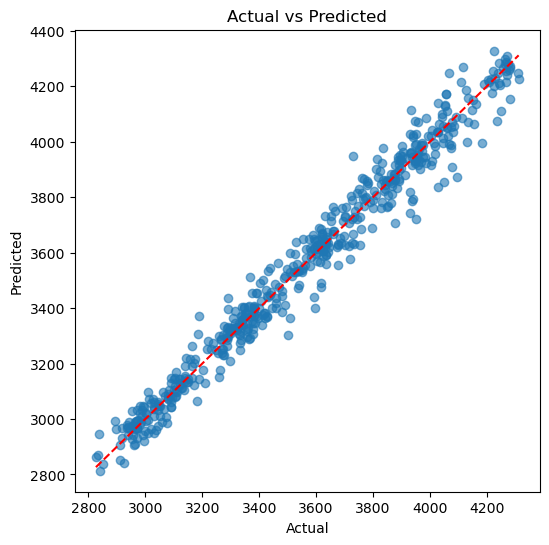

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred1, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [18]:
import joblib 
joblib.dump(lr, "TCS.NS.pkl")
model = joblib.load("TCS.NS.pkl")